# Understanding Descriptive Statistics

Import the necessary libraries here:

In [32]:
# Libraries
import numpy as np
import pandas as pd
from scipy import stats
from random import choice
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
# your code here
def rolling(rolls=10):
    r = []
    while len(r) < rolls:
        x = choice(range(1,7))
        r.append(x)
    return pd.DataFrame({"Results":r})

df = rolling()
df

,Results
0,2
1,5
2,3
3,4
4,3
5,4
6,1
7,2
8,3
9,3


#### 2.- Plot the results sorted by value.

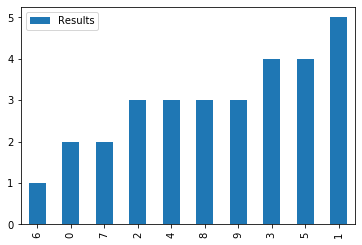

In [4]:
# your code here
sort = df.sort_values(["Results"], ascending=True)

sort.plot.bar()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

         Results
Results         
1              1
2              2
3              4
4              2
5              1


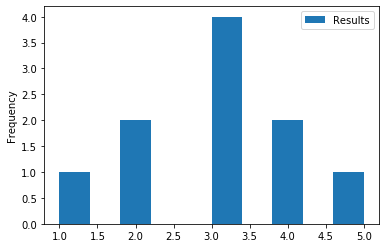

In [5]:
# your code here
freq = df.groupby("Results").agg({"Results":"count"})
print(freq)

df.plot.hist()

In [6]:
"""
Frist plot shows the result of each of the rolls of the dice, while the second shows the frequency
of each of the possible outcomes over the total of 10 rolls.
"""

'\nFrist plot shows the result of each of the rolls of the dice, while the second shows the frequency\nof each of the possible outcomes over the total of 10 rolls.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def home_made_mean(Series):
    return Series.sum()/len(Series)

print(home_made_mean(df["Results"]))
    

3.0


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
freq = df.groupby("Results").agg({"Results":"count"})
freq

,Results
Results,
1,1
2,2
3,4
4,2
5,1


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
# your code here
def home_made_median(Series):
# Sort the list
    Series = list(Series)
    Series.sort()
# Finding the position of the median
    if len(Series) % 2 == 0:
        first_median= Series[len(Series) // 2]
        second_median = Series[len(Series) // 2 - 1]
        median = (first_median + second_median) / 2
    else:
        median = Series[len(Series) // 2]
    return median

home_made_median(df["Results"])


3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
# your code here
def home_made_quartile(Series,quartile=2):
    Series = list(Series)
    Series.sort()
    if quartile == 1:
        return Series[round(len(Series)*0.25)]
    elif quartile == 2:
        return Series[round(len(Series)*0.5)]
    elif quartile == 3:
        return Series[round(len(Series)*0.75)]
    elif quartile == 4:
        return Series[round(len(Series))-1]

print(home_made_quartile(df["Results"],1))
print(home_made_quartile(df["Results"],2))
print(home_made_quartile(df["Results"],3))
print(home_made_quartile(df["Results"],4))



2
3
4
5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

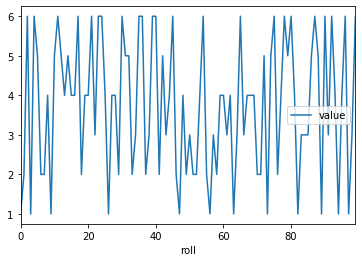

In [11]:
# your code here

dice = pd.read_csv("../data/roll_the_dice_hundred.csv")
dice.plot(x="roll",y="value")


In [12]:
"""
The distribution of the values is pretty randomic. There is obviosly no evidence of any relation
among different values. Moreover is difficult to notice which of the values has the highest
frequency, but at first sight appears to be 6.
"""

'\nThe distribution of the values is pretty randomic, for example the frequency of 5 is very lower\nthen 1 or 6, while 2 and 4 have almost the same frequecy. There is obviosly no evidence of correlation\nbetween the rolls. \n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [13]:
# your code here
home_made_mean(dice["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [14]:
# your code here
freq = dice.groupby("value").agg({"value":"count"})
freq.rename(columns={"value":"freq"}, inplace=True)
freq

,freq
value,
1,12
2,17
3,14
4,22
5,12
6,23


In [19]:
freq["rel freq"] = freq["freq"]/freq["freq"].sum(axis=0)
freq

,freq,rel freq
value,,
1,12,0.12
2,17,0.17
3,14,0.14
4,22,0.22
5,12,0.12
6,23,0.23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([0.24, 0.  , 0.34, 0.  , 0.28, 0.  , 0.44, 0.  , 0.24, 0.46]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

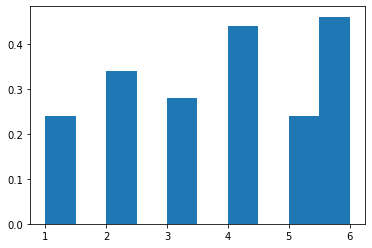

In [20]:
# your code here
plt.hist(dice["value"], density=True)


In [ ]:
"""
Comparing with the chart above, it is confirmed that 6 has actually the highest relative frequecy, but 4
has almost the same, which was more difficult to notice before. On the other hand 5 and 1 have 
the lowest freqency. Multiplying each of the potential outcomes of the roll (1 to 6) for the respective
realtive frequency shown in the chart it coul be obtained the mean value.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

(array([0.24, 0.  , 0.34, 0.  , 0.28, 0.  , 0.44, 0.  , 0.24, 0.46]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

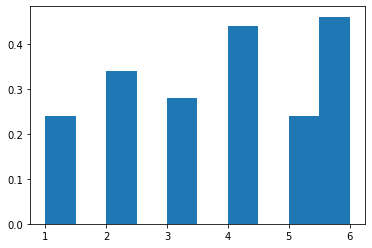

In [22]:
# your code here
dice = pd.read_csv("../data/roll_the_dice_hundred.csv")
plt.hist(dice["value"], density=True)


In [ ]:
"""
Since we are generating a new random set of 100 values, the relative frequency of each value
has now changed.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [30]:
# your code here
age = pd.read_csv("../data/ages_population.csv")

freq = age.groupby("observation").agg({"observation":"count"})
freq.rename(columns={"observation":"freq"}, inplace=True)
freq["rel freq"] = freq["freq"]/freq["freq"].sum(axis=0)
freq

,freq,rel freq
observation,,
1.0,2,0.002
2.0,2,0.002
4.0,1,0.001
5.0,2,0.002
6.0,2,0.002
...,...,...
69.0,1,0.001
70.0,1,0.001
71.0,1,0.001


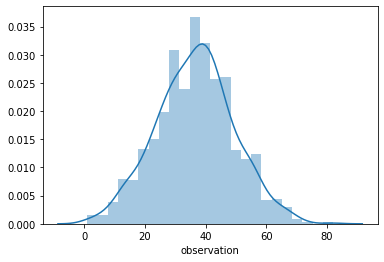

In [34]:
sns.distplot(age["observation"])

In [ ]:
"""
The mean will probably be in the range [35-40], while according to range rule of thumb the stdev is approx
equal to 1/4 of the range of data = (82-1)/4 = 81/4 = [15-20] 
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [35]:
# your code here
age.mean()

observation    36.56
dtype: float64

In [36]:
age.std()

observation    12.8165
dtype: float64

In [ ]:
"""
Mean is within the range, while Std dev is actually lower than expected. There are more values towards
the center of the distribution of frequency than the rule of thumb would suggest.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [46]:
# your code here
age2 = pd.read_csv("../data/ages_population2.csv")

freq = age2.groupby("observation").agg({"observation":"count"})
freq.rename(columns={"observation":"freq"}, inplace=True)
freq["rel freq"] = freq["freq"]/freq["freq"].sum(axis=0)
freq


,freq,rel freq
observation,,
19.0,3,0.003
20.0,13,0.013
21.0,17,0.017
22.0,35,0.035
23.0,41,0.041
24.0,78,0.078
25.0,98,0.098
26.0,120,0.120
27.0,125,0.125


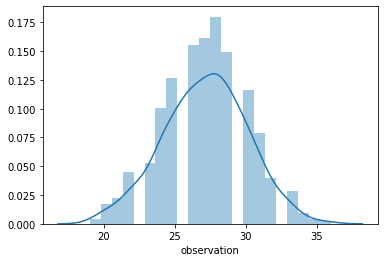

In [47]:
sns.distplot(age2["observation"])

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [52]:
"""
In this set there are no observations for some specific ages, around 26 and 29 for example. More
important, the range is significantly more compressed.This result in a lower standard deviation,
approx equal to (36-19)/4 = 17/4 = [3-4]. The mean should be in the range of [27-28]
"""

'\nIn this set there are no observations for some specific ages, around 26 and 29 for example. More\nimportant, the range is significantly more compressed.This result in a lower standard deviation,\napprox equal to (36-19)/4 = 17/4 = [3-4]. The mean should be in the range of [27-28]\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [49]:
# your code here
age2.mean()

observation    27.155
dtype: float64

In [51]:
age2.std()

observation    2.969814
dtype: float64

In [ ]:
"""
This time the estimations have been more accurate, thanks to the higher proximity of each of the 
observation to the others in this set.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [55]:
# your code here
age3 = pd.read_csv("../data/ages_population3.csv")

freq = age3.groupby("observation").agg({"observation":"count"})
freq.rename(columns={"observation":"freq"}, inplace=True)
freq["rel freq"] = freq["freq"]/freq["freq"].sum(axis=0)
freq

,freq,rel freq
observation,,
1.0,1,0.001
2.0,2,0.002
4.0,2,0.002
5.0,1,0.001
7.0,1,0.001
...,...,...
73.0,6,0.006
74.0,6,0.006
75.0,2,0.002


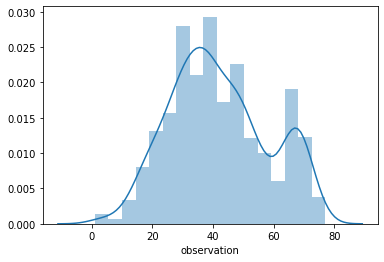

In [56]:
sns.distplot(age3["observation"])

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [74]:
# your code here
mean = age3.mean()

In [75]:
age3.std()

observation    16.144706
dtype: float64

In [76]:
"""
As can be noticed by the plot and confirmed by the mean value, people in this dataset are some
(4) years older on average than those in set 1. The variablity of the observations, represented
by the std dev is also higher. The reasons of this can be found looking at the plot:
there is a significant number of observations around 62-65 years old. This creates a
right skewed distribution, where the value of the mean and the std dev are affected by the density
of more observations to the right of the mean towards the max of the range.
"""

'\nAs can be noticed by the plot and confirmed by the mean value, people in this dataset are some\n(4) years older on average than those in set 1. The variablity of the observations, represented\nby the std dev is also higher. The reasons of this can be found looking at the plot:\nthere is a significant number of observations around 62-65 years old. This creates a bi-modal\ndistribution, which skewes the value of the mean and the std dev to the left (more observations\nto the right of the mean)\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [77]:
# your code here
print(age3.quantile(0.25))
print(age3.quantile(0.5))
print(age3.quantile(0.75))
print(age3.quantile(1))


observation    30.0
Name: 0.25, dtype: float64
observation    40.0
Name: 0.5, dtype: float64
observation    53.0
Name: 0.75, dtype: float64
observation    77.0
Name: 1, dtype: float64


In [78]:
med = age3.median()
print(mean)
print(med)

observation    41.989
dtype: float64
observation    40.0
dtype: float64


In [ ]:
"""
According to the quartiles 75% of the values observed falls before 53 years old. Also there is only
2 years of differece betweeen the mean and the median, 40 and 42 respectively. 
The combination of this 2 values suggests that there must be a signifcant amount of
observations in the remaining 25% (between 75% and 100%) which display the same value, probably
in the around 65 years old as suggested by the plot above.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [85]:
# your code here
print(age3.quantile(0.80))
print(age3.quantile(0.825))
print(age3.quantile(0.85))
print(age3.quantile(0.875))
print(age3.quantile(0.90))
print(age3.quantile(1))


observation    57.0
Name: 0.8, dtype: float64
observation    61.0
Name: 0.825, dtype: float64
observation    64.0
Name: 0.85, dtype: float64
observation    66.0
Name: 0.875, dtype: float64
observation    67.0
Name: 0.9, dtype: float64
observation    77.0
Name: 1, dtype: float64


In [ ]:
"""
Calculating the quantiles above we can notice the concentration of the observations between the
values of 62 and 67 years old, confirming the previous assumptions and the values of calcualted
before.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""